Formatting for the raw dataset. This notebook should be made to a .py file later.

# Preprocessing

In [ ]:
import pandas as pd

In [11]:
df_raw = pd.read_csv('UFM_samlet_29JUN2025.csv', sep=';', header=0, encoding='latin-1')

In [12]:
df_raw

,artikel_id,udbud_id,url,udd6,Titel,Educational_Category,displaydocclass,kaldenavn,hovedinst,hovedinsttx,...,hyppigsteid2,hyppigsteid3,hyppigstepct1,hyppigstepct2,hyppigstepct3,hyppigstetx1,hyppigstetx2,hyppigstetx3,hyppigste_statusaar,hyppigste_n
0,udb-faergenavigatoer,443401,www.ug.dk/uddannelser/andreerhvervsrettedeudda...,201900,Færgenavigatør,Andre uddannelser,Andre uddannelser,NaN,443401,Marstal Navigationsskole,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
1,udb-faergenavigatoer,999999,www.ug.dk/uddannelser/andreerhvervsrettedeudda...,201900,Færgenavigatør,Andre uddannelser,Andre uddannelser,NaN,999999,Uddannelsen på landsplan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
2,udb2-VVSinstallatoer,101616,www.ug.dk/uddannelser/erhvervsakademiuddannels...,516300,VVS-installatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,101604,Københavns Erhvervsakademi (KEA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
3,udb2-VVSinstallatoer,259408,www.ug.dk/uddannelser/erhvervsakademiuddannels...,516300,VVS-installatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,259404,Zealand Sjællands Erhvervsakademi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
4,udb2-VVSinstallatoer,461453,www.ug.dk/uddannelser/erhvervsakademiuddannels...,516300,VVS-installatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,630401,UCL Erhvervsakademi og Professionshøjskole,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,ug2-ea-elinstallatør,730404,www.ug.dk/uddannelser/erhvervsakademiuddannels...,"516200, 513200",Elinstallatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,730401,Erhvervsakademi Dania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
2145,ug2-ea-elinstallatør,281741,www.ug.dk/uddannelser/erhvervsakademiuddannels...,"516200, 513200",Elinstallatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,851454,Professionshøjskolen University College Nordjy...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
2146,ug2-ea-elinstallatør,999999,www.ug.dk/uddannelser/erhvervsakademiuddannels...,"516200, 513200",Elinstallatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,999999,Uddannelsen på landsplan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
2147,ug2-kandidatichoreography,280591,www.ug.dk/uddannelser/bachelorogkandidatuddann...,589762,Choreography,Universitetsuddannelser,Kandidatuddannelse,NaN,101518,Den Danske Scenekunstskole,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN


In [13]:
for col in df_raw.columns:
    print(col)

artikel_id
udbud_id
url
udd6
Titel
Educational_Category
displaydocclass
kaldenavn
hovedinst
hovedinsttx
instkommune
instkommunetx
instregion
instregiontx
afbrud_statusaar
afbrud_n
afbrud
afbrud_aggr
timetal_statusaar
timetal_OfSupervision
timetal_WithFewStudents
timetal_WithManyStudents
branche_statusaar
branche_n
branchepct1
branchepct2
branchepct3
branchepct4
branchetxt1
branchetxt2
branchetxt3
branchetxt4
offt_privat
ledighed_nyudd_statusaar
ledighed_nyudd_n
ledighed_nyudd
ledighed_nyudd_aggr
maanedloen_nyudd_statusaar
maanedloen_nyudd_n
maanedloen_nyudd
maanedloenp25_nyudd
maanedloenp75_nyudd
maanedloen_nyudd_aggr
ledighed_10aar_statusaar
ledighed_10aar_n
ledighed_10aar
ledighed_10aar_aggr
maanedloen_10aar_statusaar
maanedloen_10aar_n
maanedloen_10aar
maanedloenp25_10aar
maanedloenp75_10aar
maanedloen_10aar_aggr
studbesvarelser_antal
studbesvarelser_pct
fagligmiljo_statusaar
fagligmiljo_n
fagligmiljo_ntotal
fagligmiljo_likert
arbmedstud_statusaar
arbmedstud_n
arbmedstud_ntotal
arbm

In [97]:
cols = [
    'Titel',
    'Educational_Category',
    'hovedinsttx',
    'arbejdstid_timer',
    'arbmedstud_likert',
    'ensom_likert',
    'maanedloen_10aar',
    'maanedloen_nyudd',
    'tidsforbrug_p50'
]


data = df_raw[cols]
# Replace all , with . and convert to numeric
data['ensom_likert'] = pd.to_numeric(data['ensom_likert'].str.replace(',', '.'))
data['arbmedstud_likert'] = pd.to_numeric(data['arbmedstud_likert'].str.replace(',', '.'))
data['tidsforbrug_p50'] = pd.to_numeric(data['tidsforbrug_p50'].str.replace(',', '.'))

# multiply maanedloen_10aar and maanedloen_nyudd by 1000
data['maanedloen_10aar'] = round(data['maanedloen_10aar'] * 1000)
data['maanedloen_nyudd'] = round(data['maanedloen_nyudd'] * 1000)

# Remove all rows with missing values
data = data.dropna()
data

C:\Users\simon\AppData\Local\Temp\ipykernel_13028\4123888532.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ensom_likert'] = pd.to_numeric(data['ensom_likert'].str.replace(',', '.'))
C:\Users\simon\AppData\Local\Temp\ipykernel_13028\4123888532.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['arbmedstud_likert'] = pd.to_numeric(data['arbmedstud_likert'].str.replace(',', '.'))
C:\Users\simon\AppData\Local\Temp\ipykernel_13028\4123888532.py:18: SettingWithCopyWarning: 
A value is trying t

,Titel,Educational_Category,hovedinsttx,arbejdstid_timer,arbmedstud_likert,ensom_likert,maanedloen_10aar,maanedloen_nyudd,tidsforbrug_p50
8,Administrationsøkonom,Erhvervsakademiuddannelser,Zealand Sjællands Erhvervsakademi,37.0,4.13,4.17,37000.0,32300.0,36.0
10,Administrationsøkonom,Erhvervsakademiuddannelser,Uddannelsen på landsplan,37.0,3.97,3.96,37000.0,29800.0,41.0
11,Psykomotorisk terapeut,Professionsbacheloruddannelser,Københavns Professionshøjskole,34.0,3.88,3.70,24700.0,32400.0,40.0
13,Psykomotorisk terapeut,Professionsbacheloruddannelser,Uddannelsen på landsplan,34.0,3.97,3.68,27100.0,30500.0,39.0
19,Automationsteknolog,Erhvervsakademiuddannelser,Professionshøjskolen University College Nordjy...,38.0,4.09,3.84,48250.0,41650.0,41.0
...,...,...,...,...,...,...,...,...,...
2095,Socialvidenskab,Universitetsuddannelser,Uddannelsen på landsplan,36.0,4.10,3.79,48600.0,36250.0,30.0
2098,Tværvidenskabelige sundhedsstudier,Universitetsuddannelser,Roskilde Universitet,37.0,4.24,3.88,47300.0,36600.0,37.5
2099,Tværvidenskabelige sundhedsstudier,Universitetsuddannelser,Uddannelsen på landsplan,37.0,4.24,3.88,47300.0,36600.0,37.5
2138,Elinstallatør,Erhvervsakademiuddannelser,Københavns Erhvervsakademi (KEA),42.0,4.13,4.25,55500.0,42650.0,45.0


# Visualization

c:\Users\simon\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


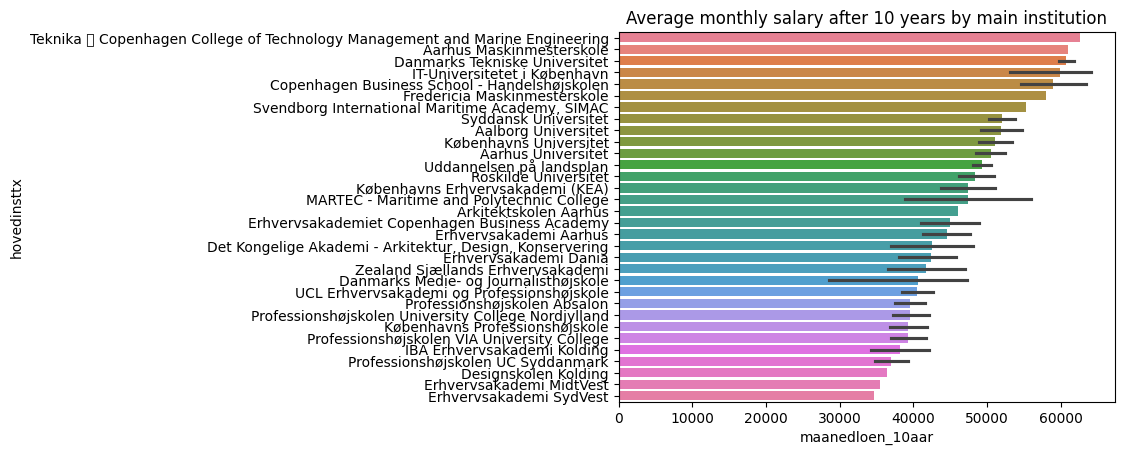

In [67]:
# Visualize the maanedloen_10aar against hovedinsttx
import matplotlib.pyplot as plt
import seaborn as sns
# make a barplot
sns.barplot(y='hovedinsttx', x='maanedloen_10aar', data=data, hue='hovedinsttx', order=data.groupby('hovedinsttx')['maanedloen_10aar'].mean().sort_values(ascending=False).index,
            hue_order=data.groupby('hovedinsttx')['maanedloen_10aar'].mean().sort_values(ascending=False).index)
plt.title('Average monthly salary after 10 years by main institution')
plt.show()

c:\Users\simon\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


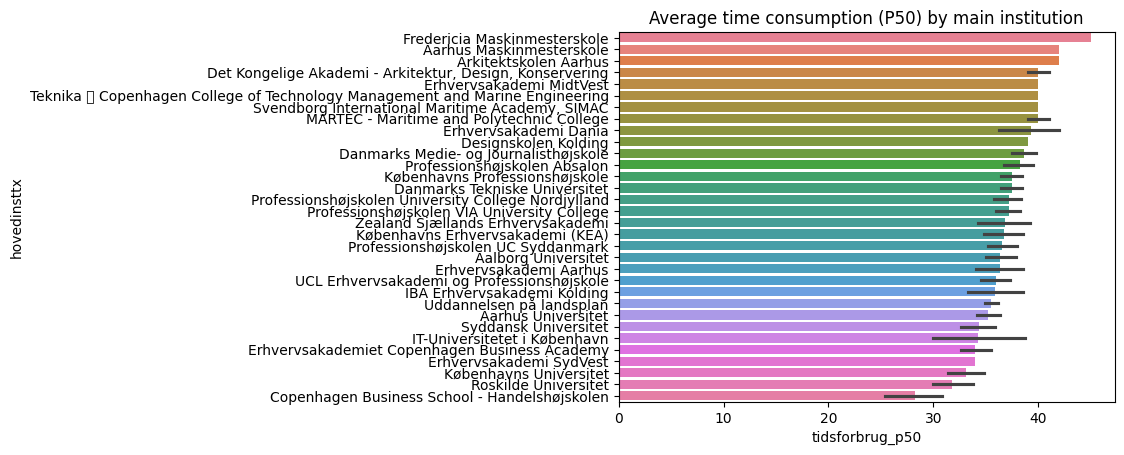

In [77]:
# Visualize the tidsforbrug_p50 against hovedinsttx
import matplotlib.pyplot as plt
import seaborn as sns
# make a barplot
sns.barplot(y='hovedinsttx', x='tidsforbrug_p50', data=data, hue='hovedinsttx', order=data.groupby('hovedinsttx')['tidsforbrug_p50'].mean().sort_values(ascending=False).index,
            hue_order=data.groupby('hovedinsttx')['tidsforbrug_p50'].mean().sort_values(ascending=False).index)
plt.title('Average time consumption (P50) by main institution')
plt.show()

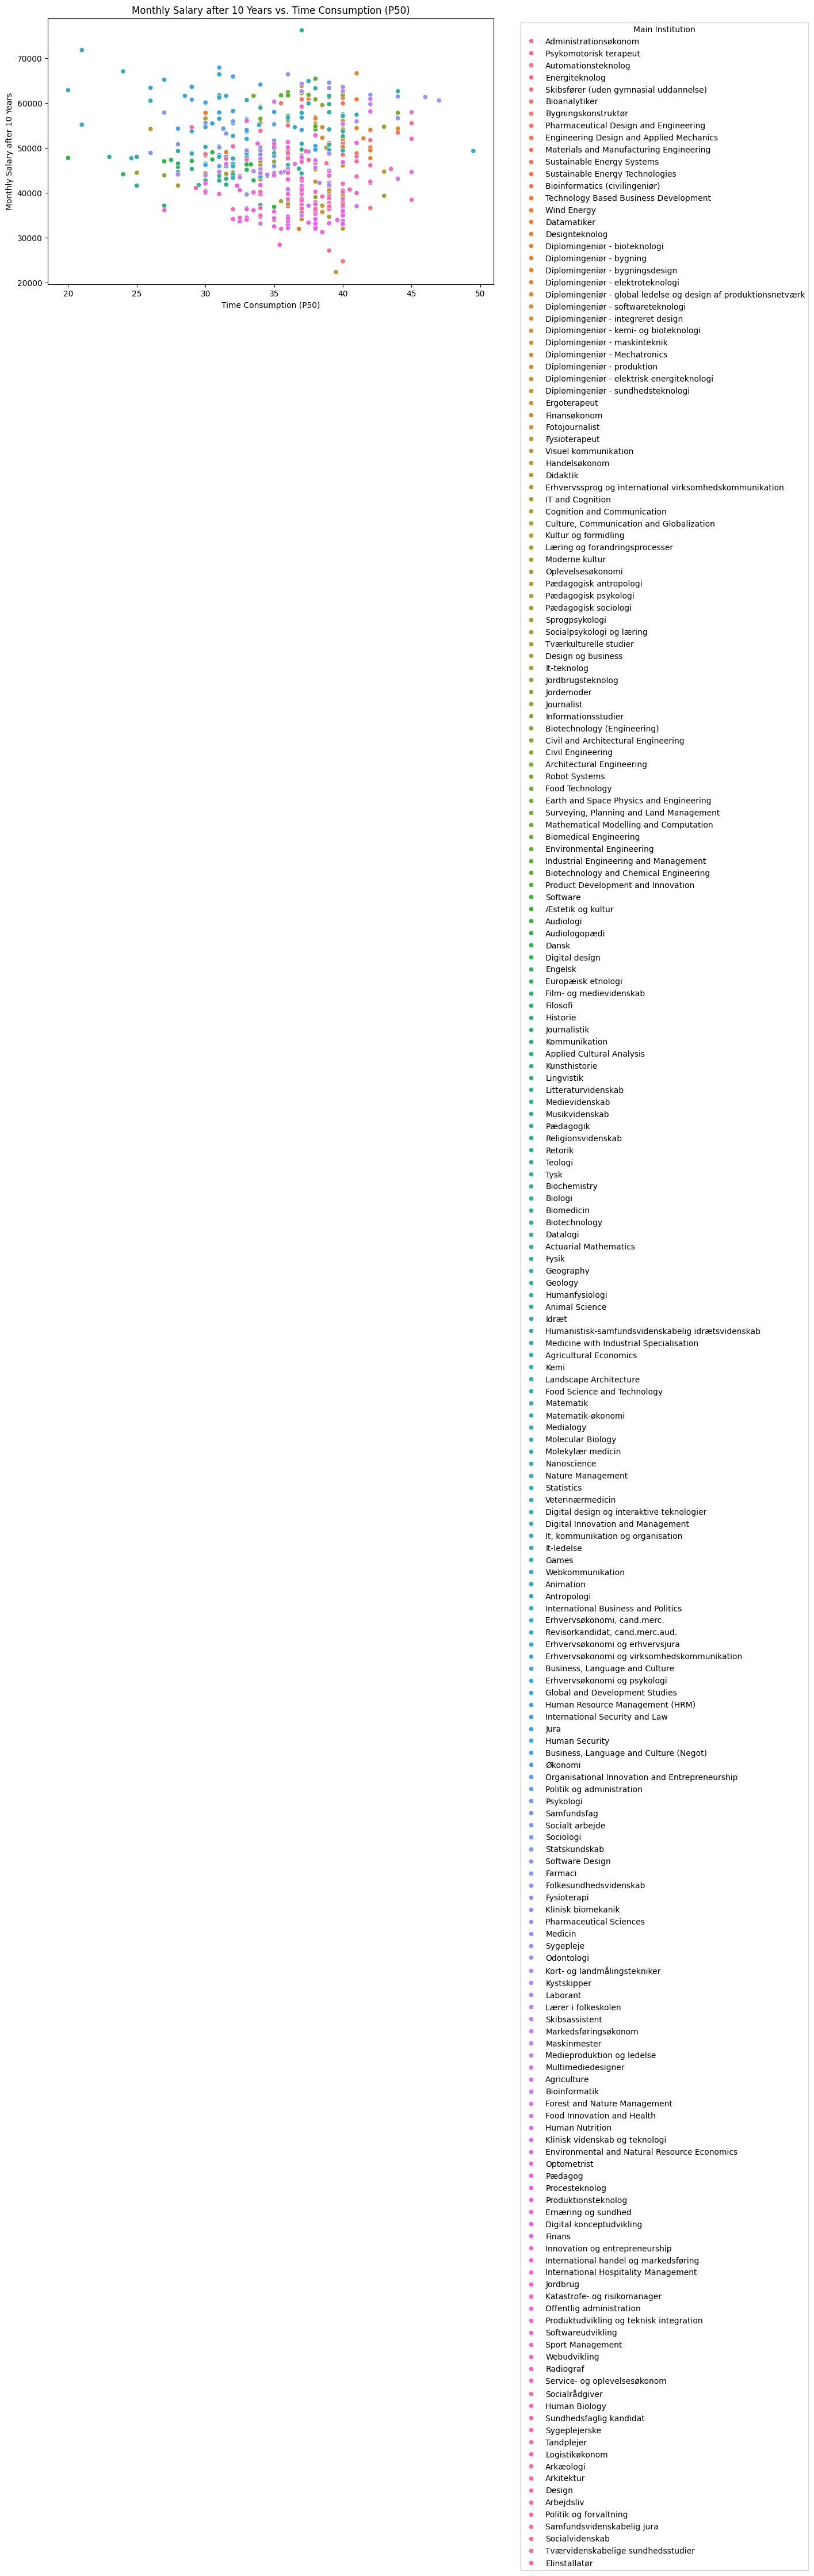

In [ ]:
# Scatterplot of maanedloen_10aar against tidsforbrug_p50
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tidsforbrug_p50', y='maanedloen_10aar', hue='Titel')
plt.title('Monthly Salary after 10 Years vs. Time Consumption (P50)')
plt.xlabel('Time Consumption (P50)')
plt.ylabel('Monthly Salary after 10 Years')
plt.legend(title='Main Institution', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [82]:
# Select the 10 most earning titles based on maanedloen_10aar
top_10_titles = data.groupby('Titel')['maanedloen_10aar'].mean().sort_values(ascending=False).head(10).index
top_10_data = data[data['Titel'].isin(top_10_titles)]
top_10_data

,Titel,hovedinsttx,arbejdstid_timer,arbmedstud_likert,ensom_likert,maanedloen_10aar,maanedloen_nyudd,tidsforbrug_p50
335,Diplomingeniør - elektrisk energiteknologi,Aarhus Universitet,39.0,4.16,3.80,63800.0,44350.0,37.0
336,Diplomingeniør - elektrisk energiteknologi,Uddannelsen på landsplan,39.0,4.03,3.81,63500.0,44350.0,40.0
741,Industrial Engineering and Management,Danmarks Tekniske Universitet,40.0,4.21,3.50,65400.0,47400.0,38.0
742,Industrial Engineering and Management,Uddannelsen på landsplan,40.0,4.21,3.50,65400.0,47400.0,38.0
970,Actuarial Mathematics,Københavns Universitet,38.0,4.36,3.79,76200.0,56100.0,37.0
971,Actuarial Mathematics,Uddannelsen på landsplan,38.0,4.36,3.79,76200.0,56100.0,37.0
1073,Digital Innovation and Management,IT-Universitetet i København,39.0,4.35,3.86,63600.0,44000.0,29.0
1074,Digital Innovation and Management,Uddannelsen på landsplan,39.0,4.35,3.86,63600.0,44000.0,29.0
1116,"Revisorkandidat, cand.merc.aud.",Copenhagen Business School - Handelshøjskolen,43.0,3.58,3.75,71800.0,51500.0,21.0
1117,"Revisorkandidat, cand.merc.aud.",Syddansk Universitet,41.0,3.58,3.67,62850.0,43050.0,20.0


In [89]:
# Select all numerical columns
numerical_cols = [col for col in data.columns if data[col].dtype != 'object']

data_titles = data.groupby('Titel')[numerical_cols].mean()

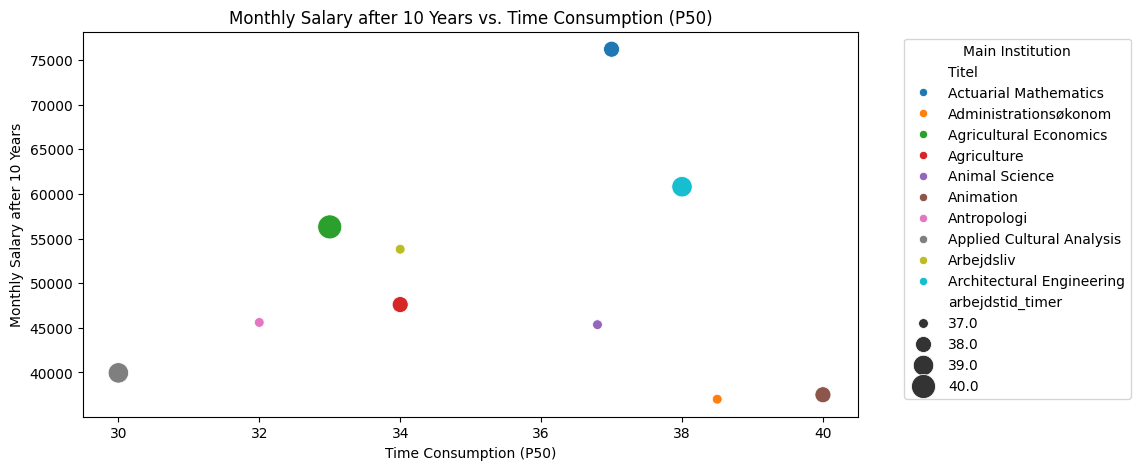

In [96]:
# Scatterplot of maanedloen_10aar against tidsforbrug_p50
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data_titles.head(10), x='tidsforbrug_p50', y='maanedloen_10aar', hue='Titel', size='arbejdstid_timer', sizes=(50, 300))
plt.title('Monthly Salary after 10 Years vs. Time Consumption (P50)')
plt.xlabel('Time Consumption (P50)')
plt.ylabel('Monthly Salary after 10 Years')
plt.legend(title='Main Institution', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

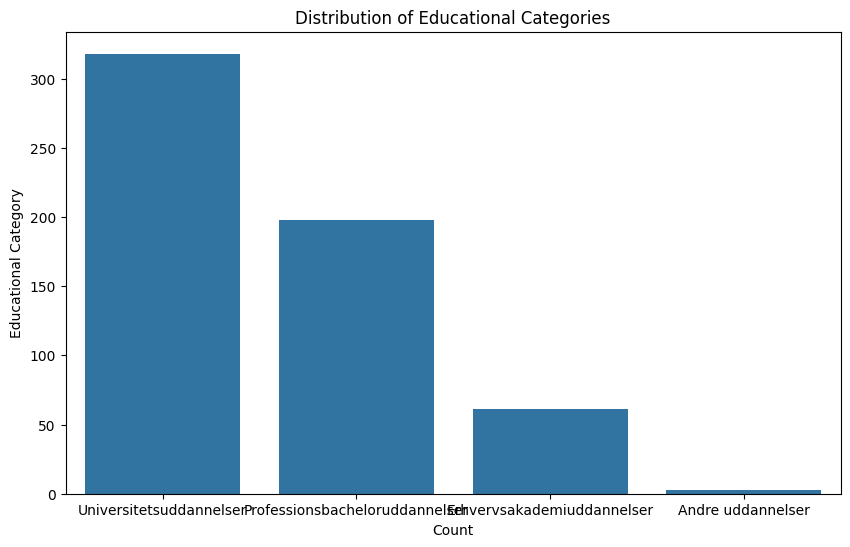

In [99]:
# Make a histogram of Educational_Category
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Educational_Category', order=data['Educational_Category'].value_counts().index)
plt.title('Distribution of Educational Categories')
plt.xlabel('Count')
plt.ylabel('Educational Category')
plt.show()